# Image Super Resolution using ESRGAN

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/hub/tutorials/image_enhancing"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/hub/blob/master/examples/colab/image_enhancing.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/hub/blob/master/examples/colab/image_enhancing.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/hub/examples/colab/image_enhancing.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/captain-pool/esrgan-tf2/1"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

**Preparing Environment**

In [1]:
import os
import time
from PIL import Image
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
os.environ["TFHUB_DOWNLOAD_PROGRESS"] = "True"

In [20]:
import tensorflow_hub as hub
import tensorflow as tf
m = tf.keras.models.Sequential([
    hub.KerasLayer("https://tfhub.dev/captain-pool/esrgan-tf2/1", trainable=True),
    tf.keras.layers.Conv2D(filters=3, kernel_size=[1, 1], strides=[1, 1])
])
m.build([None, 64, 64, 3])
m.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (None, 256, 256, 3)       4605955   
                                                                 
 conv2d_2 (Conv2D)           (None, 256, 256, 3)       12        
                                                                 
Total params: 4,605,967
Trainable params: 4,605,967
Non-trainable params: 0
_________________________________________________________________


In [3]:
# Declaring Constants
IMAGE_PATH = "C:/Users/user/Desktop/Age and Gender/test_image1.jpg"
SAVED_MODEL_PATH = "https://tfhub.dev/captain-pool/esrgan-tf2/1"

**Defining Helper Functions**

In [33]:
def preprocess_image(hr_image):
  """ Loads image from path and preprocesses to make it model ready
      Args:
        image_path: Path to the image file
  """
  
  # If PNG, remove the alpha channel. The model only supports
  # images with 3 color channels.
  if hr_image.shape[-1] == 4:
    hr_image = hr_image[...,:-1]
  hr_size = (tf.convert_to_tensor(hr_image.shape[:-1]) // 4) * 4
  hr_image = tf.image.crop_to_bounding_box(hr_image, 0, 0, hr_size[0], hr_size[1])
  hr_image = tf.cast(hr_image, tf.float32)
  return tf.expand_dims(hr_image, 0)

def save_image(image, filename):
  """
    Saves unscaled Tensor Images.
    Args:
      image: 3D image tensor. [height, width, channels]
      filename: Name of the file to save.
  """
  if not isinstance(image, Image.Image):
    image = tf.clip_by_value(image, 0, 255)
    image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  image.save("%s.jpg" % filename)
  print("Saved as %s.jpg" % filename)

In [34]:
x = preprocess_image(fake_image)

In [5]:
%matplotlib inline
def plot_image(image, title=""):
  """
    Plots images from image tensors.
    Args:
      image: 3D image tensor. [height, width, channels].
      title: Title to display in the plot.
  """

  image = np.asarray(image)
  image = tf.clip_by_value(image, 0, 255)
  image = Image.fromarray(tf.cast(image, tf.uint8).numpy())
  plt.imshow(image)
  plt.axis("off")
  plt.title(title,color ="red",fontsize = 20)

#### Performing Super Resolution of images loaded from path

In [6]:
hr_image = preprocess_image(IMAGE_PATH)
fake_image = tf.squeeze(hr_image)

Saved as Original Image.jpg


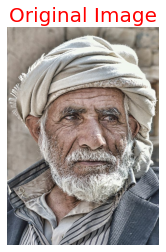

In [7]:
# Plotting Original Resolution image
plt.figure(figsize=(15,4))
plot_image(tf.squeeze(hr_image), title="Original Image")
save_image(tf.squeeze(hr_image), filename="Original Image")

In [8]:
model = hub.load(SAVED_MODEL_PATH)

### Evaluating Performance of the Model

In [65]:
# Defining helper functions
def downscale_image(image):
  """
      Scales down images using bicubic downsampling.
      Args:
          image: 3D or 4D tensor of preprocessed image
  """
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([150, 150],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image

In [46]:
# Defining helper functions
def correct_size(image):
  """
      Scales down images using bicubic downsampling.
      Args:
          image: 3D or 4D tensor of preprocessed image
  """
  image_size = []
  if len(image.shape) == 3:
    image_size = [image.shape[1], image.shape[0]]
  else:
    raise ValueError("Dimension mismatch. Can work only on single image.")

  image = tf.squeeze(
      tf.cast(
          tf.clip_by_value(image, 0, 255), tf.uint8))

  lr_image = np.asarray(
    Image.fromarray(image.numpy())
    .resize([256,256],
              Image.BICUBIC))

  lr_image = tf.expand_dims(lr_image, 0)
  lr_image = tf.cast(lr_image, tf.float32)
  return lr_image
f = correct_size(fake_image)

In [36]:
hr_image = preprocess_image(IMAGE_PATH)
hr_image = correct_size(tf.squeeze(hr_image))

AttributeError: 'str' object has no attribute 'shape'

In [39]:
lr_image = downscale_image(tf.squeeze(fake_image))

In [40]:
lr_image

<tf.Tensor: shape=(1, 150, 150, 3), dtype=float32, numpy=
array([[[[137., 139., 148.],
         [172., 163., 159.],
         [181., 168., 155.],
         ...,
         [113., 105.,  88.],
         [116., 108.,  95.],
         [117., 119., 106.]],

        [[174., 160., 158.],
         [174., 160., 149.],
         [171., 162., 145.],
         ...,
         [130., 122., 109.],
         [122., 116., 108.],
         [119., 123., 108.]],

        [[173., 155., 147.],
         [171., 156., 147.],
         [162., 156., 149.],
         ...,
         [160., 153., 143.],
         [138., 133., 127.],
         [122., 124., 114.]],

        ...,

        [[ 72.,  87., 104.],
         [ 76.,  92., 112.],
         [ 83.,  98., 119.],
         ...,
         [ 74.,  88., 108.],
         [ 71.,  84., 103.],
         [ 67.,  83., 101.]],

        [[ 75.,  88., 107.],
         [ 81.,  92., 116.],
         [ 87., 101., 124.],
         ...,
         [ 71.,  88., 107.],
         [ 68.,  85., 105.],
         

(1, 64, 64, 3)

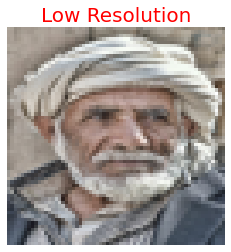

In [14]:
# Plotting Low Resolution Image

plt.figure(figsize=(4,4))
plot_image(tf.squeeze(lr_image), title="Low Resolution")
lr_img = lr_image.numpy()
lr_img.shape

In [15]:
model = hub.load(SAVED_MODEL_PATH)

In [16]:
model.build([None, 224, 224, 3])
model.summary()


AttributeError: '_UserObject' object has no attribute 'build'

In [66]:
fake_image = downscale_image(fake_image)

In [67]:
start = time.time()
fake_image = model(fake_image)
fake_image = tf.squeeze(fake_image)
print("Time Taken: %f" % (time.time() - start))

Time Taken: 2.083429


In [68]:
fake_image

<tf.Tensor: shape=(600, 600, 3), dtype=float32, numpy=
array([[[ 79.374565,  87.70979 , 103.02224 ],
        [113.49994 , 121.37042 , 135.0327  ],
        [133.1126  , 134.6402  , 142.99022 ],
        ...,
        [112.335396, 109.62047 ,  88.912   ],
        [107.33518 , 114.87508 ,  95.32981 ],
        [103.2605  , 112.30544 , 100.35742 ]],

       [[114.51966 , 126.45723 , 141.20256 ],
        [125.95685 , 121.344406, 139.76254 ],
        [127.591675, 133.37541 , 139.00241 ],
        ...,
        [108.805756, 115.68126 ,  94.74948 ],
        [115.38048 , 121.95095 ,  94.799644],
        [105.632675, 125.33037 ,  90.26371 ]],

       [[127.609955, 125.9547  , 132.2223  ],
        [137.8669  , 132.86305 , 146.73758 ],
        [131.26562 , 133.08849 , 134.41112 ],
        ...,
        [104.21104 , 117.02709 ,  96.009315],
        [109.50155 , 121.587456,  95.696594],
        [102.591225, 120.699265,  91.31112 ]],

       ...,

       [[ 61.104485,  83.81452 , 102.13303 ],
        [ 66.

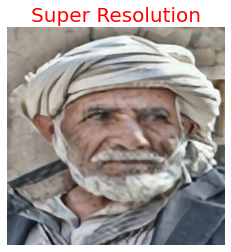

In [21]:
plt.figure(figsize=(15,4))
plot_image(tf.squeeze(fake_image), title="Super Resolution")
# Calculating PSNR wrt Original Image


In [15]:
import tensorflow as tf
import tensorflow.keras.layers as tfl
import os
from tqdm import tqdm
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import keras
import cv2
from keras.models import Sequential
import keras
import os
from tqdm import tqdm
import re
import matplotlib.pyplot as plt
from tensorflow.keras.utils import img_to_array

In [127]:
i = cv2.imread("test_image1.jpg")
i=cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
res_i=cv2.resize(i,(64,64))
res_i = res_i.astype('float32') / 255.0
img =img_to_array(res_i)

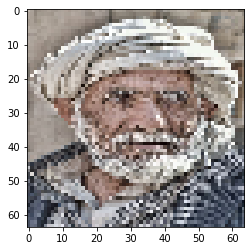

In [128]:
plt.figure(figsize=(15,4))
i = cv2.resize(i,(256,256))
plt.imshow(img)

In [64]:
img_tf = tf.convert_to_tensor(img)

In [72]:
img_tf = img_tf*225

In [87]:

lrs = (tf.convert_to_tensor(img.shape[:-1]) // 4) * 4
lr = tf.image.crop_to_bounding_box(img, 0, 0, lrs[0], lrs[1])
lr = tf.expand_dims(lr, 0)
lr = tf.cast(lr, tf.float32)

In [88]:
lr = lr*225

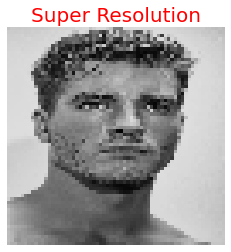

In [89]:
plt.figure(figsize=(15,4))
plot_image(tf.squeeze(lr), "Super Resolution")

In [90]:
fake_image = model(lr)

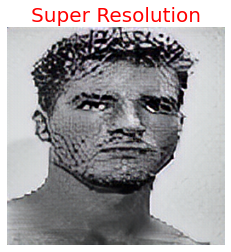

In [91]:
plt.figure(figsize=(15,4))
plot_image(tf.squeeze(fake_image), "Super Resolution")

In [59]:
lr_img = lr_img.astype('float32') / 255.0
lr_img =img_to_array(lr_img[0])


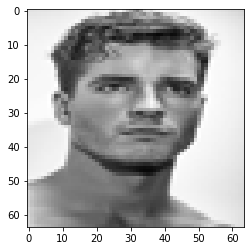

In [60]:
plt.figure(figsize=(15,4))
plt.imshow(lr_img)

In [110]:
from tensorflow.keras.models import load_model
m1 = load_model("high_resol1_256_4x.model")
m2 = load_model("high_resol2_256_4x.model")
m3 = load_model("high_resol1_256_1x.model")
m4 = load_model("high_resol2_256_1x.model")


In [138]:
SIZE = 64
HSIZE =256
predicted1_4x = np.clip(m1.predict(img.reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(HSIZE, HSIZE,3)
predicted2_4x = np.clip(m2.predict(predicted1_4x.reshape(1,HSIZE, HSIZE,3)),0.0,1.0).reshape(HSIZE, HSIZE,3)
predicted1_1x = np.clip(m1.predict(img.reshape(1,SIZE, SIZE,3)),0.0,1.0).reshape(HSIZE, HSIZE,3)
predicted2_1x = np.clip(m2.predict(predicted1_1x.reshape(1,HSIZE, HSIZE,3)),0.0,1.0).reshape(HSIZE, HSIZE,3)

1/1 [==============================] - 0s 53ms/step


**Comparing Outputs size by side.**

C:\Users\user\AppData\Local\Temp/ipykernel_9544/2729683437.py:11: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  fig.tight_layout()
C:\Users\user\AppData\Local\Temp/ipykernel_9544/2729683437.py:15: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  fig.tight_layout()
C:\Users\user\AppData\Local\Temp/ipykernel_9544/2729683437.py:20: UserWarning: tight_layout not applied: number of columns in subplot specifications must be multiples of one another.
  fig.tight_layout()


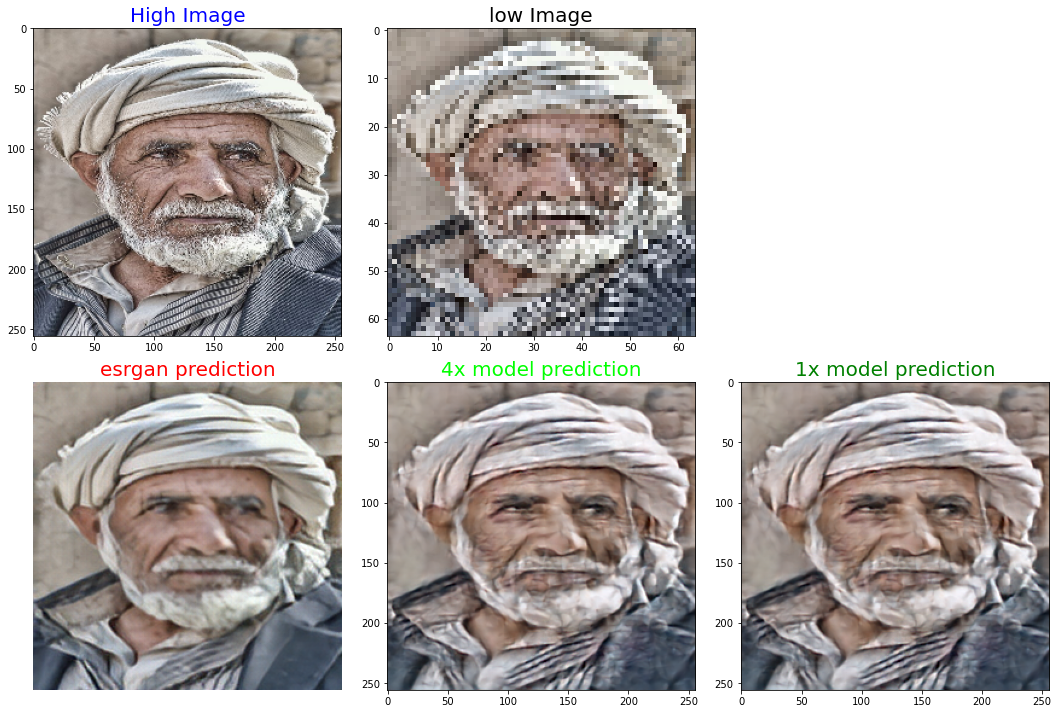

In [139]:
def plot(i,lr_img,fake_image,predicted2_4x,predicted2_1x):
    plt.rcParams['figure.figsize'] = [15, 10]
    fig, axes = plt.subplots(1, 4)
    fig.tight_layout()
    plt.subplot(231)
    plt.title('High Image', color = 'blue', fontsize = 20)
    plt.imshow(i)

    plt.subplot(232)
    plt.title('low Image', color = 'black', fontsize = 20)
    fig.tight_layout()
    plt.imshow(img)

    plt.subplot(234)
    fig.tight_layout()
    plot_image(tf.squeeze(fake_image), "esrgan prediction")

    plt.subplot(235)
    plt.title('4x model prediction', color = 'lime', fontsize = 20)
    fig.tight_layout()
    plt.imshow(predicted2_4x)
    
    
    plt.subplot(236)
    plt.title('1x model prediction', color = 'green', fontsize = 20)
    fig.tight_layout()
    plt.imshow(predicted2_1x)

    plt.savefig("ESRGAN_DIV2K.jpg", bbox_inches="tight")
plot(i,lr_img,fake_image,predicted2_4x,predicted2_1x)

In [50]:
f1 = f.numpy()

In [55]:
import math
import cmath
def correlationCoefficient(X, Y) :
    X = X.flatten()
    Y = Y.flatten()


    n = len(X) 
    sum_X = 0
    sum_Y = 0
    sum_XY = 0
    squareSum_X = 0
    squareSum_Y = 0


    i = 0
    for i in range(n) : 
        sum_X = sum_X + X[i]
        sum_Y = sum_Y + Y[i] 
        sum_XY = sum_XY + X[i] * Y[i] 
        squareSum_X = squareSum_X + X[i] * X[i] 
        squareSum_Y = squareSum_Y + Y[i] * Y[i] 

        i = i + 1

    corr = (n * sum_XY - sum_X * sum_Y)/(cmath.sqrt((n * squareSum_X - sum_X * sum_X)* (n * squareSum_Y - sum_Y * sum_Y))) 
    return corr





print ('{0:.6f}'.format(correlationCoefficient(i,f1))) 
print ('{0:.6f}'.format(correlationCoefficient(i,predicted2))) 

C:\Users\user\AppData\Local\Temp/ipykernel_8/2280468406.py:21: RuntimeWarning: overflow encountered in ubyte_scalars
  squareSum_X = squareSum_X + X[i] * X[i]
C:\Users\user\AppData\Local\Temp/ipykernel_8/2280468406.py:26: RuntimeWarning: overflow encountered in long_scalars
  corr = (n * sum_XY - sum_X * sum_Y)/(cmath.sqrt((n * squareSum_X - sum_X * sum_X)* (n * squareSum_Y - sum_Y * sum_Y)))


396.694950+0.000000j
398.335982+0.000000j
